In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Dictionary

#### Open
The opening price is the price from the first transaction of a business day.

During a regular trading day, the balance between supply and demand fluctuates as the attractiveness of the stock's price increases and decreases. Therefore, the opening price may or may not be different from the previous day's closing price. A stock’s closing price that determines how a share performed during the day.

#### High
The high is the highest price at which a stock traded during a period.

#### Low
The low is the lowest price at which a stock traded during a period.

#### Volume
The volume is the number of shares that changed hands during a given day.

If there's a higher volume of trading in a particular stock, that naturally means that investors are interested in buying or selling it. If volume and price are on the rise, it means investors are betting the company will do well. If volume is up but price is down, it means more investors are looking to sell.

#### Adjusted Close
The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. It factors in anything that might affect the stock price after the market closes. 

In [128]:
df = pd.read_excel('train_data.xlsx', index_col=False, sheet_name=None)
df

{'Train':               Open          High           Low  Volume     Adj Close
 0      2450.000000   2542.550049   2431.000000  5572.0   2398.945068
 1      2575.000000   2598.000000   2530.300049  3620.0   2406.021484
 2      2540.000000   2599.000000   2422.550049  8347.0   2431.730957
 3      2535.000000   2560.000000   2470.000000  2831.0   2370.639404
 4      2545.000000   2555.000000   2480.000000  5054.0   2357.806885
 ...            ...           ...           ...     ...           ...
 3454  67004.000000  67347.000000  65897.000000  5788.0  65936.664063
 3455  66200.000000  67503.000000  65105.199219  9920.0  67135.382813
 3456  67398.898438  67699.000000  66526.000000  8775.0  66503.914063
 3457  67279.000000  67475.000000  66980.000000  4257.0  66853.562500
 3458  67550.000000  67550.000000  66812.398438  5943.0  66801.398438
 
 [3459 rows x 5 columns],
 'Test':              Open          High           Low  Volume
 0    67299.000000  67299.000000  66500.398438    4193
 1   

In [129]:
df_copy = df['Train'].copy()

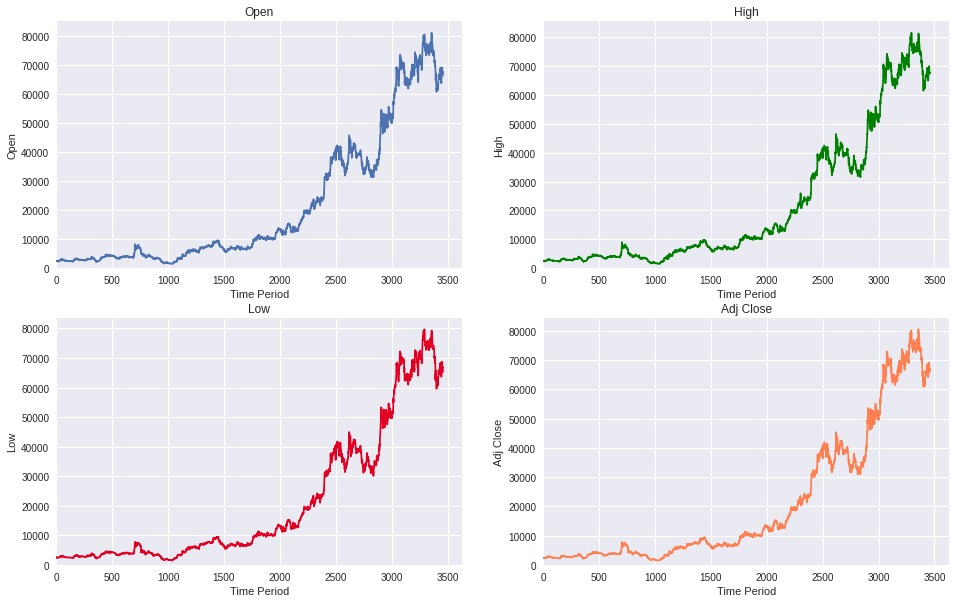

In [130]:
# Plotting graphs.
plt.style.use('seaborn')
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(16, 10))

ax0.plot(np.arange(0, 3459, 1), df_copy['Open'])
ax0.set_xlim(0)
ax0.set_ylim(0)
ax0.set_xlabel('Time Period')
ax0.set_ylabel('Open');
ax0.set_title('Open')

ax1.plot(np.arange(0, 3459, 1), df_copy['High'], c='green')
ax1.set_xlim(0)
ax1.set_ylim(0)
ax1.set_xlabel('Time Period')
ax1.set_ylabel('High');
ax1.set_title('High')

ax2.plot(np.arange(0, 3459, 1), df_copy['Low'], c='#E30022')
ax2.set_xlim(0)
ax2.set_ylim(0)
ax2.set_xlabel('Time Period')
ax2.set_ylabel('Low');
ax2.set_title('Low')

ax3.plot(np.arange(0, 3459, 1), df_copy['Adj Close'], c='coral')
ax3.set_xlim(0)
ax3.set_ylim(0)
ax3.set_xlabel('Time Period')
ax3.set_ylabel('Adj Close');
ax3.set_title('Adj Close');

In [131]:
# Checking data.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3459 entries, 0 to 3458
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3445 non-null   float64
 1   High       3445 non-null   float64
 2   Low        3445 non-null   float64
 3   Volume     3445 non-null   float64
 4   Adj Close  3445 non-null   float64
dtypes: float64(5)
memory usage: 135.2 KB


In [134]:
# Checking for null data.
null_data = df_copy[df_copy.isnull().any(axis=1)]
null_data

,Open,High,Low,Volume,Adj Close
209,NaN,NaN,NaN,NaN,NaN
967,NaN,NaN,NaN,NaN,NaN
1228,NaN,NaN,NaN,NaN,NaN
1229,NaN,NaN,NaN,NaN,NaN
1230,NaN,NaN,NaN,NaN,NaN
1231,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN
1257,NaN,NaN,NaN,NaN,NaN
1735,NaN,NaN,NaN,NaN,NaN
1774,NaN,NaN,NaN,NaN,NaN


In [3]:
# Splitting into train and test.
train = df['Train'].copy() 
test = df['Test'].copy()

# Dropping missing rows.
train.dropna(inplace=True)
train.reset_index(inplace=True, drop=True)

# Spltting into X & y.
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

In [4]:
# Splitting into train and test sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
def mean_absolute_percentage_error(y_true, y_preds): 
    """
    This function calculates the mean absolute percentage error given
    true values and predictions.
    """
    
    y_true, y_preds = np.array(y_true), np.array(y_preds)
    
    return np.mean(np.abs((y_true - y_preds) / y_true)) * 100

In [135]:
# Testing some linear models.
from sklearn import linear_model

reg = linear_model.LinearRegression()
lasso = linear_model.Lasso(max_iter=4000, normalize=True)
elastic_net = linear_model.ElasticNet(max_iter=4000)

reg.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)

y_preds_reg = reg.predict(X_test)
y_preds_lasso = lasso.predict(X_test)
y_preds_elastic_net = elastic_net.predict(X_test)

print('MAPE for LinearRegression() = ', mean_absolute_percentage_error(y_test, y_preds_reg))
print('MAPE for Lasso() = ', mean_absolute_percentage_error(y_test, y_preds_lasso))
print('MAPE for ElasticNet() = ', mean_absolute_percentage_error(y_test, y_preds_elastic_net))

MAPE for LinearRegression() =  0.9481388686647668
MAPE for Lasso() =  1.2862331523921413
MAPE for ElasticNet() =  1.3154949442788613


In [8]:
# Scaling data.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

minmax = MinMaxScaler()
X_train_minmax = minmax.fit_transform(X_train)
X_test_minmax = minmax.transform(X_test)

In [9]:
# Checking for improvement after using StandarScaler.
reg.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
elastic_net.fit(X_train_scaled, y_train)

y_preds_reg = reg.predict(X_test_scaled)
y_preds_lasso = lasso.predict(X_test_scaled)
y_preds_elastic_net = elastic_net.predict(X_test_scaled)

print('MAPE for LinearRegression(), scaled = ', mean_absolute_percentage_error(y_test, y_preds_reg))
print('MAPE for Lasso(), scaled = ', mean_absolute_percentage_error(y_test, y_preds_lasso))
print('MAPE for ElasticNet(), scaled = ', mean_absolute_percentage_error(y_test, y_preds_elastic_net))

MAPE for LinearRegression(), scaled =  0.9481388686647219
MAPE for Lasso(), scaled =  1.2862331523920445
MAPE for ElasticNet(), scaled =  40.10484056644313


In [78]:
# Checking for improvement after using MinMaxScaler.
reg.fit(X_train_minmax, y_train)
lasso.fit(X_train_minmax, y_train)
elastic_net.fit(X_train_minmax, y_train)

y_preds_reg = reg.predict(X_test_minmax)
y_preds_lasso = lasso.predict(X_test_minmax)
y_preds_elastic_net = elastic_net.predict(X_test_minmax)

print('MAPE for LinearRegression(), min-max scaled = ', mean_absolute_percentage_error(y_test, y_preds_reg))
print('MAPE for Lasso(), min-max scaled = ', mean_absolute_percentage_error(y_test, y_preds_lasso))
print('MAPE for ElasticNet(), min-max scaled = ', mean_absolute_percentage_error(y_test, y_preds_elastic_net))

MAPE for LinearRegression(), min-max scaled =  0.9481388686647705
MAPE for Lasso(), min-max scaled =  1.2862331523920625
MAPE for ElasticNet(), min-max scaled =  193.42025908164862


In [13]:
# Testing with Support Vector Machines
from sklearn import svm

svr_reg1 = svm.SVR(kernel='rbf')
svr_reg2 = svm.SVR(kernel='rbf')
svr_reg3 = svm.SVR(kernel='rbf')

svr_reg1.fit(X_train, y_train)
y_preds_svr = svr_reg1.predict(X_test)

print('MAPE for SVR() = ', mean_absolute_percentage_error(y_test, y_preds_svr))

svr_reg2.fit(X_train_scaled, y_train)
y_preds_svr = svr_reg2.predict(X_test_scaled)

print('MAPE for SVR(), scaled = ', mean_absolute_percentage_error(y_test, y_preds_svr))

svr_reg3.fit(X_train_minmax, y_train)
y_preds_svr = svr_reg3.predict(X_test_minmax)

print('MAPE for SVR(), min-max scaled = ', mean_absolute_percentage_error(y_test, y_preds_svr))

MAPE for SVR() =  110.51235108737252
MAPE for SVR(), scaled =  110.24216789338116
MAPE for SVR(), min-max scaled =  111.47535270657436


In [29]:
# Finding better hyperparameters for SVR.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

mape = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

svr_reg = svm.SVR(kernel='rbf')

param_grid = {'C': [0.1, 1, 100, 1000, 2500, 5000, 10000], 
              'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100],
              'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5, 10, 25]}

reg_gs = GridSearchCV(svr_reg, param_grid=param_grid, cv=[(slice(None), slice(None))], n_jobs = -1, scoring=mape)

In [19]:
reg_gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
             estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 100, 1000, 2500],
                         'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                     0.1, 0.5, 1, 5, 10],
                         'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5, 10]},
             scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False))

In [20]:
reg_gs.best_params_

{'C': 2500, 'epsilon': 1, 'gamma': 0.005}

In [21]:
y_preds_gs = reg_gs.predict(X_test_scaled)

print('MAPE for SVR(), scaled and tuned = ', mean_absolute_percentage_error(y_test, y_preds_gs))

MAPE for SVR(), scaled and tuned =  1.6651679177956051


In [30]:
reg_gs.fit(X_train_minmax, y_train)

GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
             estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 100, 1000, 2500, 5000, 10000],
                         'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                     0.1, 0.5, 1, 5, 10, 100],
                         'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5, 10, 25]},
             scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False))

In [31]:
reg_gs.best_params_

{'C': 10000, 'epsilon': 0.0001, 'gamma': 25}

In [32]:
y_preds_gs = reg_gs.predict(X_test_minmax)

print('MAPE for SVR(), min-max scaled and tuned = ', mean_absolute_percentage_error(y_test, y_preds_gs))

MAPE for SVR(), min-max scaled and tuned =  0.9243114548410423


In [115]:
# Trying some ensemble models.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rfr = RandomForestRegressor().fit(X_train, y_train)
gbr = GradientBoostingRegressor().fit(X_train, y_train)

y_preds_rfr = rfr.predict(X_test)
y_preds_gbr = gbr.predict(X_test)

print('MAPE for RandomForestRegressor() = ', mean_absolute_percentage_error(y_test, y_preds_rfr))
print('MAPE for GradientBoostingRegressor() = ', mean_absolute_percentage_error(y_test, y_preds_gbr))

MAPE for RandomForestRegressor() =  0.9275654744456923
MAPE for GradientBoostingRegressor() =  1.3592761600988987


In [11]:
# Checking for improvement with min-max scaling.
rfr.fit(X_train_minmax, y_train)
gbr.fit(X_train_minmax, y_train)

y_preds_rfr = rfr.predict(X_test_minmax)
y_preds_gbr = gbr.predict(X_test_minmax)

print('MAPE for RandomForestRegressor(), min-max scaled = ', mean_absolute_percentage_error(y_test, y_preds_rfr))
print('MAPE for GradientBoostingRegressor(), mine-max scaled = ', mean_absolute_percentage_error(y_test, y_preds_gbr))

MAPE for RandomForestRegressor(), min-max scaled =  0.9230068454282345
MAPE for GradientBoostingRegressor(), mine-max scaled =  1.363973164653485


MAPE for GradientBoostingRegressor() =  1.052013643949103


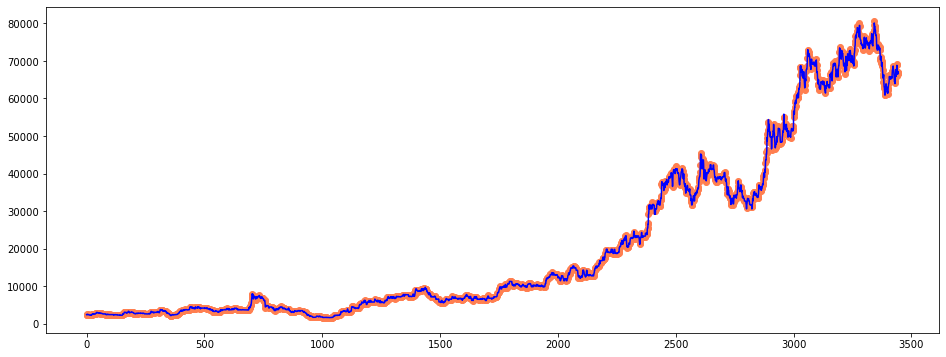

In [125]:
y_preds_full = gbr.predict(X)

fig, ax = plt.subplots(figsize=(16, 6))

ax.scatter(np.arange(0, 3445, 1), y, c='coral')
ax.plot(np.arange(0, 3445, 1), y_preds_full, c='blue')

print('MAPE for GradientBoostingRegressor() = ', mean_absolute_percentage_error(y, y_preds_full))

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

mape = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

param_grid = {"n_estimators": np.arange(10, 100, 10),
              "max_features": [0.5, 1, "auto", "sqrt"],
              "max_depth": [None, 3, 5, 7, 10],
              "min_samples_split": np.arange(2, 20, 2),
              "min_samples_leaf": np.arange(1, 20, 2)}

rfr_gs = GridSearchCV(rfr, param_grid=param_grid, cv=[(slice(None), slice(None))], n_jobs = -1, scoring=mape)

In [20]:
rfr_gs.fit(X_train_minmax, y_train)

GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 7, 10],
                         'max_features': [0.5, 1, 'auto', 'sqrt'],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False))

In [21]:
y_preds_gs = rfr_gs.predict(X_test_minmax)

print('MAPE for RandomForestRegressor(), min-max scaled and tuned = ', mean_absolute_percentage_error(y_test, y_preds_gs))

MAPE for RandomForestRegressor(), min-max scaled and tuned =  0.9346974882624081


In [70]:
svr_reg = svm.SVR(kernel='rbf',
                  C=100000, 
                  epsilon=0.0001,
                  gamma=25)

svr_reg.fit(X_train_minmax, y_train)

y_preds_gs = svr_reg.predict(X_test_minmax)

print('MAPE for SVR() = ', mean_absolute_percentage_error(y_test, y_preds_gs))

MAPE for SVR() =  0.8003379899447512


MAPE for SVR() =  0.6930937282994395


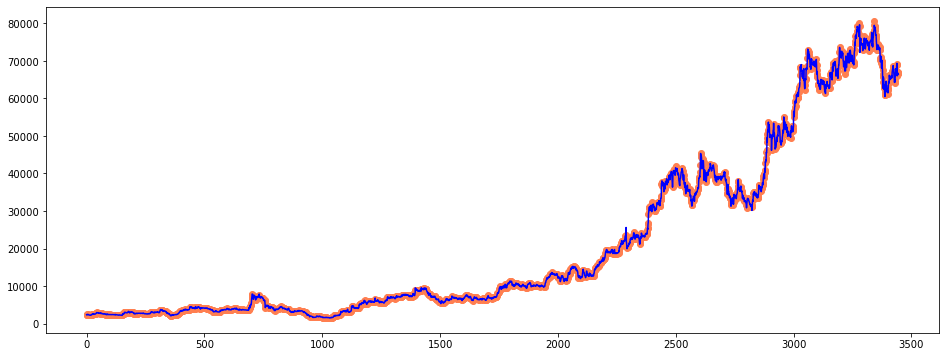

In [124]:
X_minmaxed = minmax.transform(X)

y_preds_full = svr_reg.predict(X_minmaxed)

fig, ax = plt.subplots(figsize=(16, 6))

ax.scatter(np.arange(0, 3445, 1), y, c='coral')
ax.plot(np.arange(0, 3445, 1), y_preds_full, c='blue')

print('MAPE for SVR() = ', mean_absolute_percentage_error(y, y_preds_full))

MAPE for RandomForestRegressor() =  0.45587623706540104


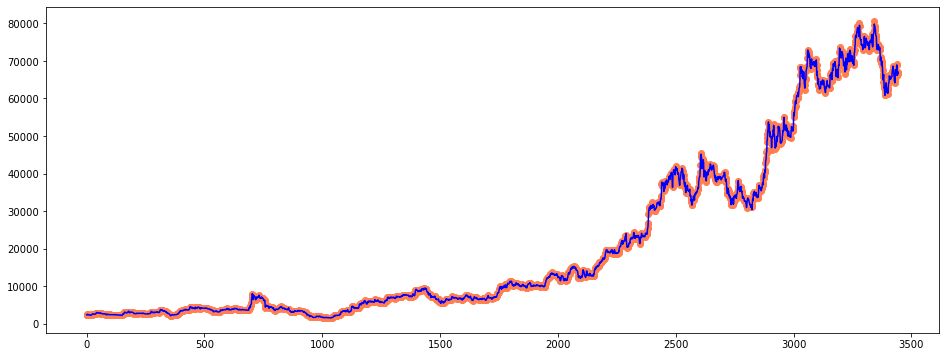

In [123]:
y_preds_full = rfr.predict(X)

fig, ax = plt.subplots(figsize=(16, 6))

ax.scatter(np.arange(0, 3445, 1), y, c='coral')
ax.plot(np.arange(0, 3445, 1), y_preds_full, c='blue')

print('MAPE for RandomForestRegressor() = ', mean_absolute_percentage_error(y, y_preds_full))

In [66]:
X_copy = X.copy()
X_copy['High-Low'] = X_copy['High'] - X_copy['Low']
X_copy

,Open,High,Low,Volume,High-Low
0,2450.000000,2542.550049,2431.000000,5572.0,111.550049
1,2575.000000,2598.000000,2530.300049,3620.0,67.699951
2,2540.000000,2599.000000,2422.550049,8347.0,176.449951
3,2535.000000,2560.000000,2470.000000,2831.0,90.000000
4,2545.000000,2555.000000,2480.000000,5054.0,75.000000
...,...,...,...,...,...
3440,67004.000000,67347.000000,65897.000000,5788.0,1450.000000
3441,66200.000000,67503.000000,65105.199219,9920.0,2397.800781
3442,67398.898438,67699.000000,66526.000000,8775.0,1173.000000
3443,67279.000000,67475.000000,66980.000000,4257.0,495.000000


In [75]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_copy, y, test_size=0.20, random_state=42)

rfr_fe = RandomForestRegressor()

rfr_fe.fit(X_train1, y_train1)

y_preds_fe = rfr_fe.predict(X_test1)

print('MAPE for SVR() = ', mean_absolute_percentage_error(y_test1, y_preds_fe))

MAPE for SVR() =  0.9445872840547771


MAPE for RandomForestRegressor() =  0.4608826756530529


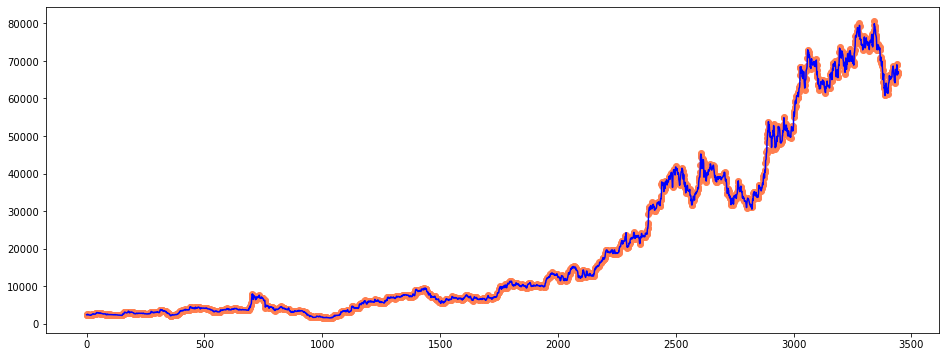

In [122]:
y_preds_full = rfr_fe.predict(X_copy)

fig, ax = plt.subplots(figsize=(16, 6))

ax.scatter(np.arange(0, 3445, 1), y, c='coral')
ax.plot(np.arange(0, 3445, 1), y_preds_full, c='blue')

print('MAPE for RandomForestRegressor() = ', mean_absolute_percentage_error(y, y_preds_full))

MAPE for SVR() =  0.9014723263565503


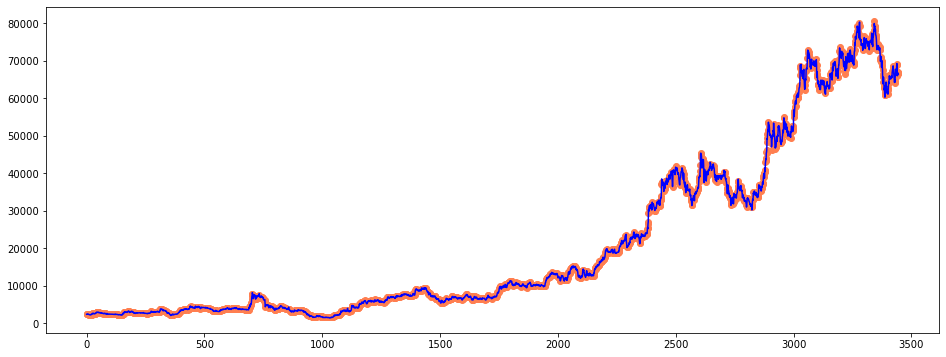

In [121]:
y_preds_full = reg.predict(X)

fig, ax = plt.subplots(figsize=(16, 6))

ax.scatter(np.arange(0, 3445, 1), y, c='coral')
ax.plot(np.arange(0, 3445, 1), y_preds_full, c='blue')

print('MAPE for SVR() = ', mean_absolute_percentage_error(y, y_preds_full))

In [136]:
from sklearn.tree import DecisionTreeRegressor

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, random_state=42)

dec = DecisionTreeRegressor(criterion='friedman_mse', 
                            random_state=100, 
                            min_samples_leaf=7, 
                            min_impurity_decrease=0.05).fit(X_train, y_train)

y_preds_dec = dec.predict(X_test)

print('MAPE for DecisionTreeRegressor() = ', mean_absolute_percentage_error(y_test, y_preds_dec))
dec.score(X_test, y_test)

MAPE for DecisionTreeRegressor() =  1.1500241115607883


0.9996754405816696

MAPE for DecisionTreeRegressor() =  0.8021534849019222


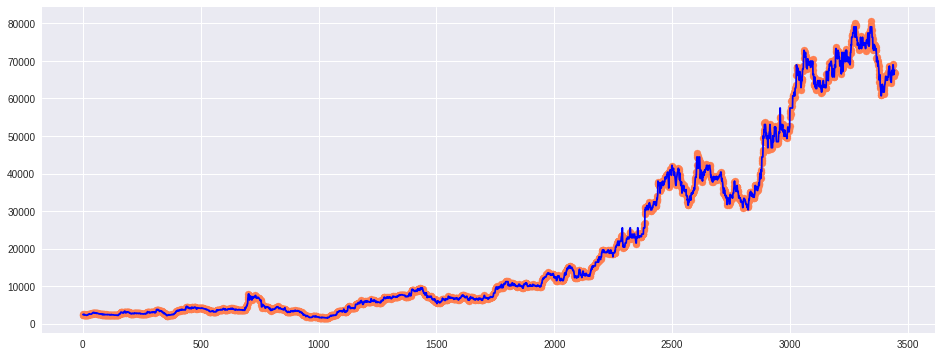

In [137]:
y_preds_full = dec.predict(X)

fig, ax = plt.subplots(figsize=(16, 6))

ax.scatter(np.arange(0, 3445, 1), y, c='coral')
ax.plot(np.arange(0, 3445, 1), y_preds_full, c='blue')

print('MAPE for DecisionTreeRegressor() = ', mean_absolute_percentage_error(y, y_preds_full))

In [88]:
y_test

443      4363.540039
51       2866.085449
794      3924.633545
1572     6676.580078
1437     9334.163086
            ...     
581      3655.717529
2490    40666.386719
3384    62850.261719
73       2564.281982
48       2812.465820
Name: Adj Close, Length: 689, dtype: float64

MAPE for SVR() =  1.2277911615106636


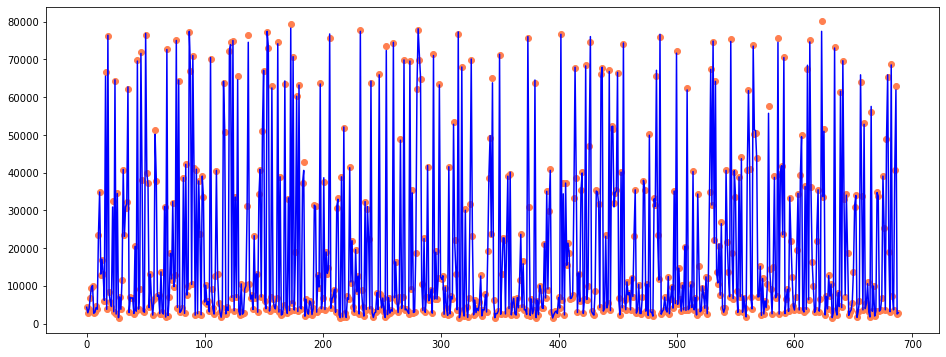

In [120]:
y_preds_full = dec.predict(X_test)

fig, ax = plt.subplots(figsize=(16, 6))

ax.scatter(np.arange(0, 689, 1), y_test, c='coral')
ax.plot(np.arange(0, 689, 1), y_preds_full, c='blue')

print('MAPE for SVR() = ', mean_absolute_percentage_error(y_test, y_preds_full))

In [111]:
dec = DecisionTreeRegressor()

param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],}

mape = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

dec_gs = GridSearchCV(dec, param_grid=param_grid, cv=5, n_jobs = -1, scoring=mape)

dec_gs.fit(X_train, y_train)

dec_gs.best_params_

{'criterion': 'mae',
 'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 20}

In [114]:
y_preds_gs = dec_gs.predict(X_test)

print('MAPE for DecisionTreeRegressor(), tuned = ', mean_absolute_percentage_error(y_test, y_preds_gs))

MAPE for DecisionTreeRegressor(), tuned =  1.5704768851520376
